### Resolución problema No.1 - Mónica Velásquez

In [61]:
!pip install wordcloud

In [62]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')  
nltk.download('punkt')  
nltk.download('omw-1.4') 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\monic\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\monic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\monic\AppData\Roaming\nltk_data...


True

In [63]:
dataset = pd.read_csv('tw_source.csv', encoding='latin_1', header=None)
dataset.columns = ['valor', 'id', 'fecha', 'fuente', 'usuario', 'tweet']

In [64]:
lista_menciones = []
filas_per_at = {}
cont = 0

for tweet in dataset['tweet']:
    ats_in_tweet = [palabra for palabra in tweet.split(' ') if '@' in palabra]
    lista_menciones.extend(ats_in_tweet)

    try:
        ultimo_at = ats_in_tweet[-1]
        filas_per_at.setdefault(ultimo_at, []).append(cont)
    except:
        pass
    finally:
        cont += 1

In [65]:
contador_menciones = Counter(lista_menciones)
usuarios_mas_mencionados = contador_menciones.most_common(4)[1:] 
print(usuarios_mas_mencionados)

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]


In [66]:
corpus_usuarios = {}
for usuario, _ in usuarios_mas_mencionados:
    filas_usuario = filas_per_at[usuario]
    corpus_usuarios[usuario] = dataset.iloc[filas_usuario, [1, 2, 5]].reset_index(drop=True)
    corpus_usuarios[usuario]['length'] = corpus_usuarios[usuario]['tweet'].apply(len)

In [67]:
for usuario in corpus_usuarios:
    print(f"Corpus para {usuario}:")
    print(corpus_usuarios[usuario].head())
    print("\n")

Corpus para @mileycyrus:
           id                         fecha  \
0  1468063101  Mon Apr 06 23:30:57 PDT 2009   
1  1468286517  Tue Apr 07 00:45:20 PDT 2009   
2  1468297110  Tue Apr 07 00:49:07 PDT 2009   
3  1468298918  Tue Apr 07 00:49:44 PDT 2009   
4  1468318249  Tue Apr 07 00:56:41 PDT 2009   

                                               tweet  length  
0  @mileycyrus hahaha dont be like that one time ...     107  
1  @mileycyrus i have the same problem, but it's ...     137  
2  @mileycyrus I guess counting sheep didn't work...      72  
3  @mileycyrus I would too if it meant spending a...     100  
4  @mileycyrus AWWW u seriously have the cutest d...     112  


Corpus para @tommcfly:
           id                         fecha  \
0  1468233211  Tue Apr 07 00:26:52 PDT 2009   
1  1468391638  Tue Apr 07 01:23:07 PDT 2009   
2  1468502040  Tue Apr 07 02:03:41 PDT 2009   
3  1468618787  Tue Apr 07 02:46:02 PDT 2009   
4  1468674970  Tue Apr 07 03:05:49 PDT 2009   

      

In [68]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [69]:
def limpiar_texto(texto):
    palabras = word_tokenize(texto.lower())
    palabras = [word for word in palabras if word.isalpha() and word not in stop_words]
    palabras_stem = [ps.stem(word) for word in palabras]
    palabras_lem = [lemmatizer.lemmatize(word) for word in palabras_stem]
    return palabras_lem 

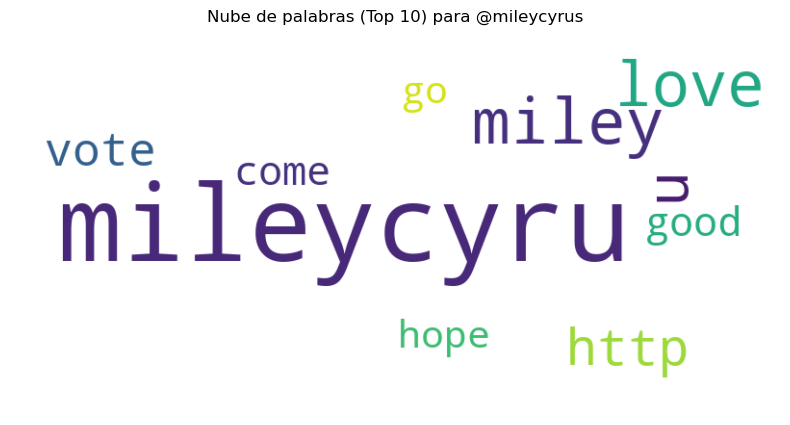

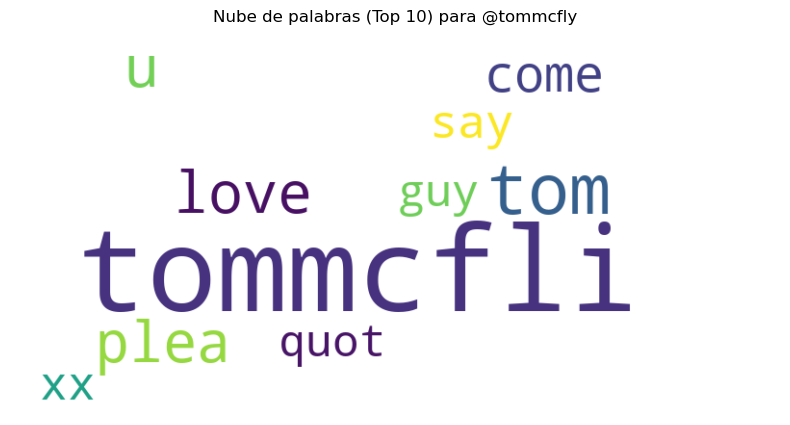

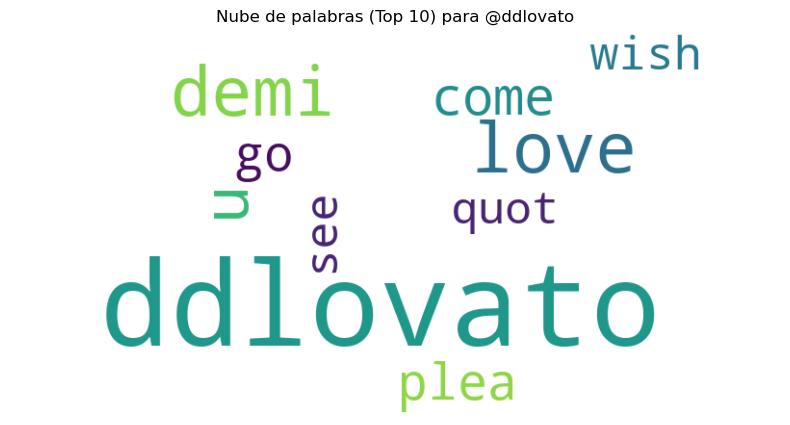

In [70]:
for usuario in corpus_usuarios:
    corpus_usuarios[usuario]['tweet_limpio'] = corpus_usuarios[usuario]['tweet'].apply(limpiar_texto)
    todas_palabras = [palabra for tweet in corpus_usuarios[usuario]['tweet_limpio'] for palabra in tweet]
    contador_palabras = Counter(todas_palabras)
    top_10_palabras = dict(contador_palabras.most_common(10))
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_palabras)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nube de palabras (Top 10) para {usuario}")
    plt.show()